In [1]:
import pandas as pd
a=pd.read_csv("/media/santhosh/4678A3FC78A3E8BF/download/Social_Network_Ads.csv")
a

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [2]:
a.columns[a.isna().any()]

Index([], dtype='object')

In [4]:
from sklearn.preprocessing import LabelEncoder

# Encode Gender
le = LabelEncoder()
a['Gender'] = le.fit_transform(a['Gender'])   # Male=1, Female=0


In [15]:
x = a[['Gender', 'Age', 'EstimatedSalary']]
y = a['Purchased']

In [8]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [10]:
y_pred=model.predict(x_test)

In [11]:
x_pred=model.predict(x_train)

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.8875

In [25]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[50,  2],
       [ 7, 21]])

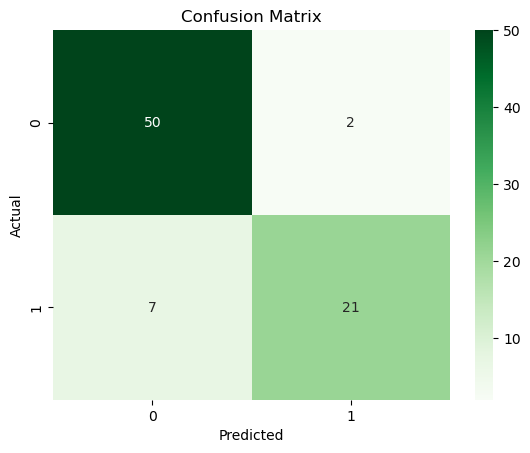

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [27]:
import pandas as pd

# Take average salary
avg_salary = a['EstimatedSalary'].mean()

# Create dataset with fixed Gender=1 (Male)
x_curve = pd.DataFrame({
    'Gender': [1]*len(ages),
    'Age': ages.flatten(),
    'EstimatedSalary': [avg_salary]*len(ages)
})

# Predict probability for "Purchased = 1"
prob = model.predict_proba(x_curve)[:,1]


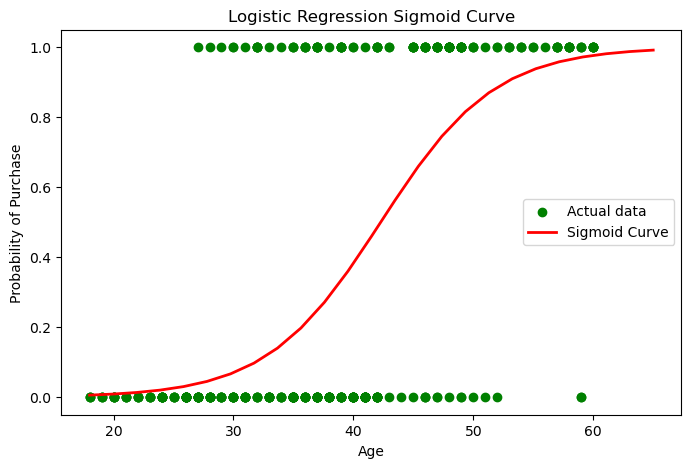

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(x_train['Age'], y_train, color='green', label='Actual data')
plt.plot(ages, prob, color='red', linewidth=2, label='Sigmoid Curve')
plt.xlabel('Age')
plt.ylabel('Probability of Purchase')
plt.title('Logistic Regression Sigmoid Curve')
plt.legend()
plt.show()
